In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/Pavansabavat/Website-data/master/reviews%20data.csv")
data = data.dropna()
print(data.head())



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                              Review
0  nice hotel expensive parking got good deal sta...
1  ok nothing special charge diamond member hilto...
2  nice rooms not 4* experience hotel monaco seat...
3  unique, great stay, wonderful time hotel monac...
4  great stay great stay, went seahawk game aweso...


In [ ]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"]  = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["Review"]]
data.head()

,Review,Positive,Negative,Neutral,Compound
0,nice hotel expensive parking got good deal sta...,0.285,0.072,0.643,0.9747
1,ok nothing special charge diamond member hilto...,0.189,0.110,0.701,0.9787
2,nice rooms not 4* experience hotel monaco seat...,0.219,0.081,0.700,0.9889
3,"unique, great stay, wonderful time hotel monac...",0.385,0.060,0.555,0.9912
4,"great stay great stay, went seahawk game aweso...",0.221,0.135,0.643,0.9797


In [ ]:
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data["Sentiment"] = sentiment
data.head()

,Review,Positive,Negative,Neutral,Compound,Sentiment
0,nice hotel expensive parking got good deal sta...,0.285,0.072,0.643,0.9747,Positive
1,ok nothing special charge diamond member hilto...,0.189,0.110,0.701,0.9787,Positive
2,nice rooms not 4* experience hotel monaco seat...,0.219,0.081,0.700,0.9889,Positive
3,"unique, great stay, wonderful time hotel monac...",0.385,0.060,0.555,0.9912,Positive
4,"great stay great stay, went seahawk game aweso...",0.221,0.135,0.643,0.9797,Positive


In [ ]:
print(data["Sentiment"].value_counts())

Positive    18831
Negative     1569
Neutral        91
Name: Sentiment, dtype: int64


In [ ]:
data.to_csv("new_data.csv")

##  Extra   Stuff

In [1]:
df=pd.read_csv('new_data.csv')

In [2]:
data.head()

Axes(0.125,0.11;0.775x0.77)
Positive    18831
Negative     1569
Neutral        91
Name: Sentiment, dtype: int64


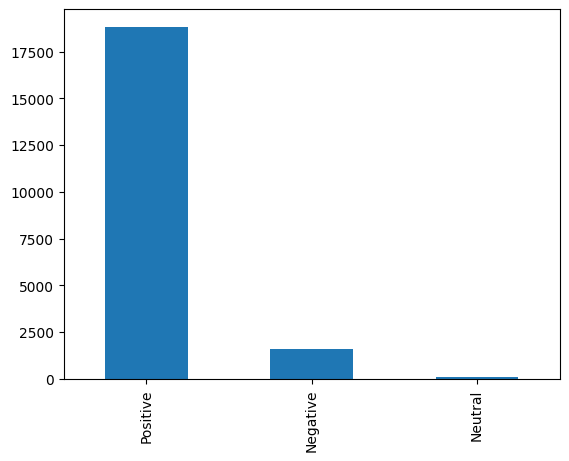

In [ ]:
print(df['Sentiment'].value_counts().plot(kind='bar'))
print(df['Sentiment'].value_counts())

In [ ]:
print(df.head())

   Unnamed: 0                                             Review  Positive  \
0           0  nice hotel expensive parking got good deal sta...     0.285   
1           1  ok nothing special charge diamond member hilto...     0.189   
2           2  nice rooms not 4* experience hotel monaco seat...     0.219   
3           3  unique, great stay, wonderful time hotel monac...     0.385   
4           4  great stay great stay, went seahawk game aweso...     0.221   

   Negative  Neutral  Compound Sentiment  
0     0.072    0.643    0.9747  Positive  
1     0.110    0.701    0.9787  Positive  
2     0.081    0.700    0.9889  Positive  
3     0.060    0.555    0.9912  Positive  
4     0.135    0.643    0.9797  Positive  
